In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec

prop=mpl.font_manager.FontProperties('Helvetica Neue')
mpl.rcParams['font.sans-serif'] = prop.get_name()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.weight']=200
mpl.rcParams['axes.labelweight']=200
mpl.rcParams['font.size']=22

import baltic as bt
import requests

In [2]:
nexus_url='https://github.com/ebov/space-time/raw/master/Data/Makona_1610_cds_ig.GLM.MCC.tree' ## where the tree we'll use lives
nexus_file='Ebola.tree' ## name of local file we'll be writing to

tree_string=requests.get(nexus_url) ## request file from URL
out_file=open(nexus_file,'w') ## start a new file
out_file.write(tree_string.text) ## write URL response to file
out_file.close() ## close file

nexus_tree=bt.loadNexus(nexus_file) ## call baltic's loadNexus function on local file

nexus_tree.treeStats() ## report stats of tree


Tree height: 1.772658
Tree length: 121.249284
strictly bifurcating tree
annotations present

Numbers of objects in tree: 3219 (1609 nodes and 1610 leaves)



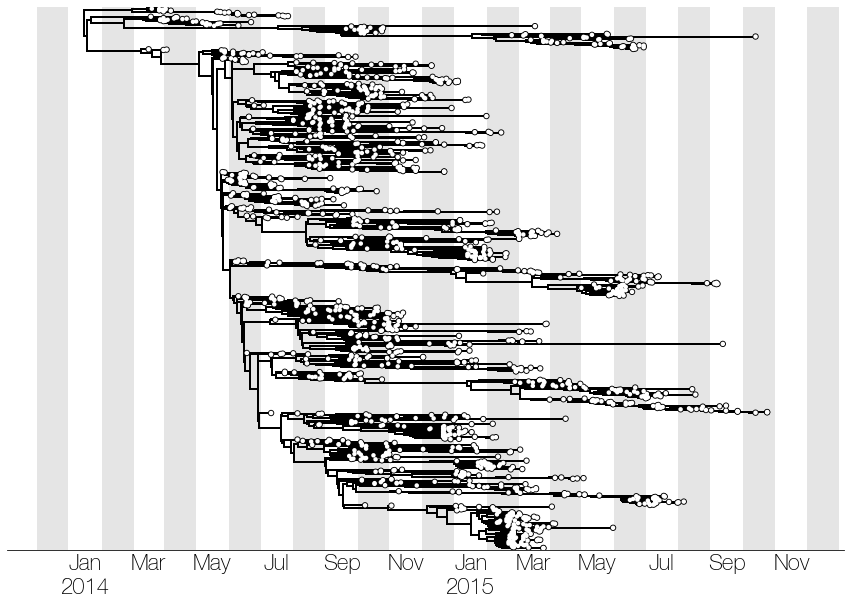

In [3]:
fig = plt.figure(figsize=(15, 10),facecolor='w') ## create figure
gs = gridspec.GridSpec(1,1,wspace=0.0) ## using gridspec by default
ax=plt.subplot(gs[0],facecolor='w') ## create axes

x_attr=lambda k: k.absoluteTime ## x coordinate will be absolute time
nexus_tree.plotTree(ax,x_attr=x_attr,colour='k') ## plot tree
nexus_tree.plotPoints(ax,x_attr=x_attr,size=20,colour='w') ## plot points at tips
ax.plot()

[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']] ## remove all figure spines except bottom

calendar_timeline=['2013-12-01'] ## create a list of monthly dates to serve as the x axis grid
calendar_timeline+=['2014-%02d-01'%(m) for m in range(1,13)]
calendar_timeline+=['2015-%02d-01'%(m) for m in range(1,13)]

ax.set_xticks([bt.decimalDate(t)+15/365 for t in calendar_timeline]) ## set tick positions - to position tick label in the middle of the month we'll add ticks 15 days after month start

[ax.axvspan(bt.decimalDate(calendar_timeline[t]),bt.decimalDate(calendar_timeline[t])+30/365,facecolor='k',edgecolor='none',alpha=0.1) for t in range(len(calendar_timeline)) if t%2==0] ## add a transparent interval spanning a month, every two months

xlabels=[] ## need to process labels a bit
for d in range(len(calendar_timeline)):
    if calendar_timeline[d].split('-')[1]=='01': ## if January
        xlabels.append(bt.convertDate(calendar_timeline[d],'%Y-%m-%d','%b\n%Y')) ## convert date to year and 3-letter month
    else:
        if (d+1)%2==0: ## if month+1 is divisible by two - just month
            xlabels.append(bt.convertDate(calendar_timeline[d],'%Y-%m-%d','%b')) ## convert full date to 3-letter month
        else: ## any other month
            xlabels.append('') ## empty label
            
ax.set_xticklabels(xlabels) ## set labels

ax.tick_params(size=0) ## no tick labels
ax.set_yticks([])
ax.set_yticklabels([]) ## no y axis ticks or labels
ax.set_xlim(nexus_tree.root.absoluteTime-0.2,nexus_tree.root.absoluteTime+nexus_tree.treeHeight+0.2) ## limit x axis
ax.set_ylim(-5,nexus_tree.ySpan+5) ## limit y axis

plt.show()